In [52]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import scipy.integrate as integrate
import scipy.special as special
import scipy.signal as ssignal

In [34]:
REC_MARKER = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 255], dtype=np.uint8)
NUM_SAMPLES = 1024
DATA_DT = np.dtype([('timestamp', np.int64),  # 8 Byte
                    ('n_samples', np.uint16),  # 2 Byte
                    ('rec_num', np.uint16),  # 2 Byte
                    ('samples', ('>i2', NUM_SAMPLES)),  # 2 Byte each x 1024 typ.
                    ('rec_mark', (np.uint8, len(REC_MARKER)))])  # 10 Byte

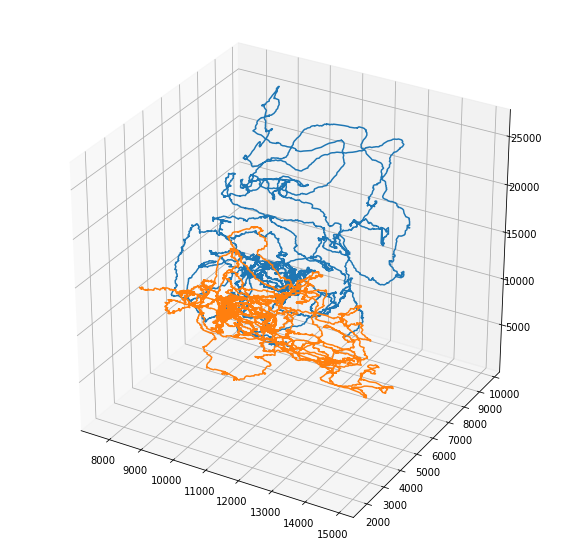

In [35]:
ac_path = '/home/melisa/Documents/social_interaction/accelerometer/'

fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(1, 1)

init = 50000
final = 100000
   
aux1 = np.memmap(ac_path + '100_AUX1_0.continuous', dtype=DATA_DT, offset=1024)['samples'].flatten()
aux2 = np.memmap(ac_path + '100_AUX2_0.continuous', dtype=DATA_DT, offset=1024)['samples'].flatten()
aux3 = np.memmap(ac_path + '100_AUX3_0.continuous', dtype=DATA_DT, offset=1024)['samples'].flatten()

aux4 = np.memmap(ac_path + '100_AUX4_0.continuous', dtype=DATA_DT, offset=1024)['samples'].flatten()
aux5 = np.memmap(ac_path + '100_AUX5_0.continuous', dtype=DATA_DT, offset=1024)['samples'].flatten()
aux6 = np.memmap(ac_path + '100_AUX6_0.continuous', dtype=DATA_DT, offset=1024)['samples'].flatten()

ax1 = fig.add_subplot(grid[0,0],projection='3d')
ax1.plot(aux1[init:final],aux2[init:final],aux3[init:final])

ax1.plot(aux4[init:final],aux5[init:final],aux6[init:final])

In [64]:
speed1 =  ssignal.medfilt([integrate.trapz(aux1[i:i+2], np.arange(i,i+2)) for i in range(init,final)],11)
pos1 = ssignal.medfilt([integrate.trapz(speed1[i:i+2], np.arange(i,i+2)) for i in range(len(speed1))],11)

speed2 = ssignal.medfilt([integrate.trapz(aux2[i:i+2], np.arange(i,i+2)) for i in range(init,final)],11)
pos2 =ssignal.medfilt([integrate.trapz(speed2[i:i+2], np.arange(i,i+2)) for i in range(len(speed2))],11)

speed3 = ssignal.medfilt([integrate.trapz(aux3[i:i+2], np.arange(i,i+2)) for i in range(init,final)],11)
pos3 = ssignal.medfilt([integrate.trapz(speed3[i:i+2], np.arange(i,i+2)) for i in range(len(speed3))],11)

speed4 =  ssignal.medfilt([integrate.trapz(aux4[i:i+2], np.arange(i,i+2)) for i in range(init,final)],11)
pos4 = ssignal.medfilt([integrate.trapz(speed4[i:i+2], np.arange(i,i+2)) for i in range(len(speed1))],11)

speed5 = ssignal.medfilt([integrate.trapz(aux5[i:i+2], np.arange(i,i+2)) for i in range(init,final)],11)
pos5 =ssignal.medfilt([integrate.trapz(speed5[i:i+2], np.arange(i,i+2)) for i in range(len(speed2))],11)

speed6 = ssignal.medfilt([integrate.trapz(aux6[i:i+2], np.arange(i,i+2)) for i in range(init,final)],11)
pos6 = ssignal.medfilt([integrate.trapz(speed6[i:i+2], np.arange(i,i+2)) for i in range(len(speed3))],11)

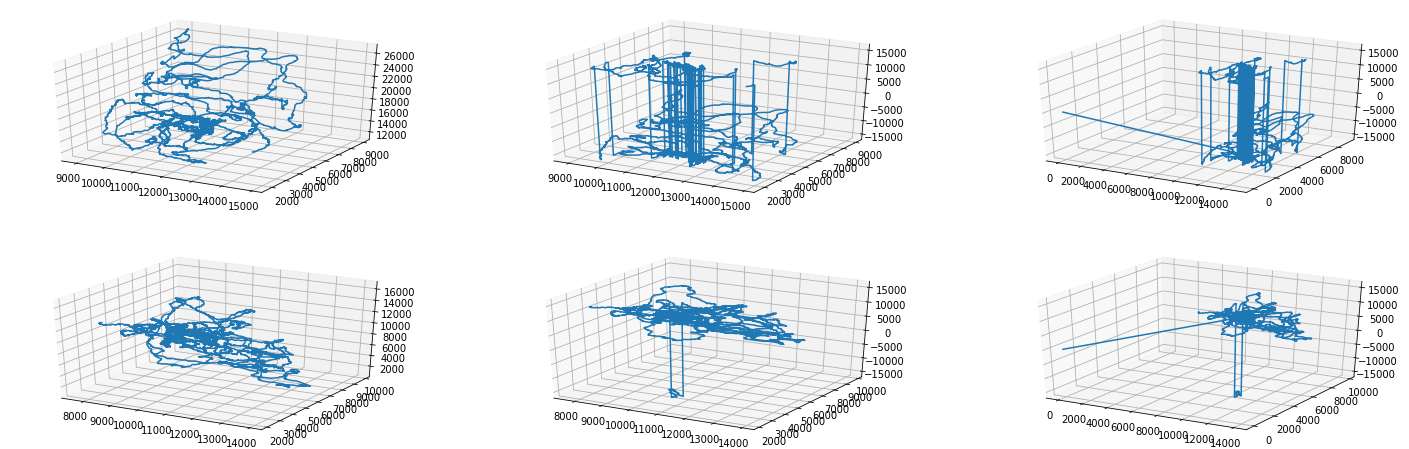

In [67]:
fig = plt.figure(figsize=(25, 8))
grid = plt.GridSpec(2, 3)

ax1 = fig.add_subplot(grid[0,0],projection='3d')
ax1.plot(aux1[init:final],aux2[init:final],aux3[init:final])
#ax1.plot(aux4[init:final],aux5[init:final],aux6[init:final])

ax2 = fig.add_subplot(grid[0,1],projection='3d')
ax2.plot(speed1,speed2,speed3)

ax3 = fig.add_subplot(grid[0,2],projection='3d')
ax3.plot(pos1,pos2,pos3)

ax4 = fig.add_subplot(grid[1,0],projection='3d')
ax4.plot(aux4[init:final],aux5[init:final],aux6[init:final])
#ax1.plot(aux4[init:final],aux5[init:final],aux6[init:final])

ax5 = fig.add_subplot(grid[1,1],projection='3d')
ax5.plot(speed4,speed5,speed6)

ax6 = fig.add_subplot(grid[1,2],projection='3d')
ax6.plot(pos4,pos5,pos6)

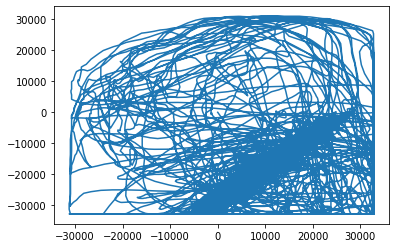

In [75]:
plt.plot(aux6,-aux3)